# Comparative Anlysis 

 >Key industries covered by each firm.

 >Top themes and topics highlighted by KPMG and PwC.

 > Comparative insights between the two firms.

 >Visualizations of the findings.

In [9]:
pip install matplotlib-venn


 Models, Algorithms & Tools Used:

- Preprocessing: Custom stopword filtering, regex cleaning
- Industry Classification: Rule-based + semantic similarity using SentenceTransformers
- Topic Extraction: TF-IDF + keyword frequency
- Clustering: UMAP for dimensionality reduction, HDBSCAN for unsupervised clustering
- Tools: pandas, scikit-learn, sentence-transformers, umap-learn, hdbscan, seaborn, matplotlib


 Industries Covered by KPMG:
classified_topic
Supply Chain               18
Workforce                   5
Risk and Regulation         4
Cyber security              3
Transformation              3
Trade and tariffs           2
Economy and Growth          2
Technology                  1
Energy and Renewables       1
Artificial Intelligence     1
Name: count, dtype: int64

 Industries Covered by PwC:
classified_topic
Supply Chain             9
Trade and tariffs        6
Energy and Renewables    4
Risk and Regulation      2
Workforce                2
Name: count, dtype: int64

 Top Keywo

<Figure size 1200x600 with 0 Axes>

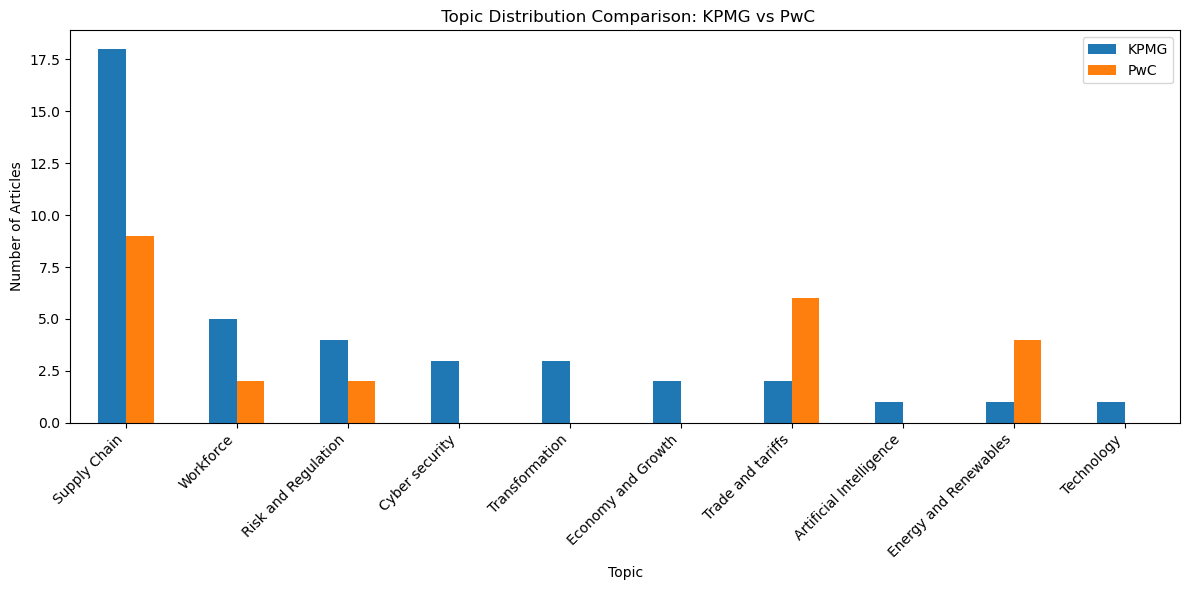


 Comparative Insights:
• Both firms cover these common themes: Trade and tariffs, Workforce, Supply Chain, Risk and Regulation, Energy and Renewables
• KPMG-Only Topics: Technology, Transformation, Artificial Intelligence, Cyber security, Economy and Growth
• PwC-Only Topics: 

• KPMG articles focus more on technology, ESG, transformation, and global capability centers.
• PwC covers more articles on compliance, financial strategy, and market outlook.
• Overall, both firms emphasize digital transformation, regulatory change, and sustainability.



In [8]:
# ---- Imports ----
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import ast

# ---- Load Enriched Data ----
kpmg_df = pd.read_csv("kpmg_articles_enriched.csv")
pwc_df = pd.read_csv("pwc_articles_enriched.csv")

# Parse list columns
for df in [kpmg_df, pwc_df]:
    df["top_keywords"] = df["top_keywords"].apply(ast.literal_eval)
    df["cluster_keywords"] = df["cluster_keywords"].apply(ast.literal_eval)

# ---- Summary of Approach ----
print(" Models, Algorithms & Tools Used:")
print("""
- Preprocessing: Custom stopword filtering, regex cleaning
- Industry Classification: Rule-based + semantic similarity using SentenceTransformers
- Topic Extraction: TF-IDF + keyword frequency
- Clustering: UMAP for dimensionality reduction, HDBSCAN for unsupervised clustering
- Tools: pandas, scikit-learn, sentence-transformers, umap-learn, hdbscan, seaborn, matplotlib
""")

# ---- Key Industries Covered ----
print("\n Industries Covered by KPMG:")
print(kpmg_df["classified_topic"].value_counts())
print("\n Industries Covered by PwC:")
print(pwc_df["classified_topic"].value_counts())

# ---- Top Themes / Topics ----
def extract_top_keywords(df):
    counter = Counter([kw for kws in df["top_keywords"] for kw in kws])
    return counter.most_common(10)

kpmg_keywords = extract_top_keywords(kpmg_df)
pwc_keywords = extract_top_keywords(pwc_df)

print("\n Top Keywords - KPMG:")
print(kpmg_keywords)
print("\n Top Keywords - PwC:")
print(pwc_keywords)

# ---- Comparative Topic Distribution ----
kpmg_topics = kpmg_df["classified_topic"].value_counts().rename_axis("classified_topic").reset_index(name="KPMG")
pwc_topics = pwc_df["classified_topic"].value_counts().rename_axis("classified_topic").reset_index(name="PwC")

topic_compare_df = pd.merge(kpmg_topics, pwc_topics, on="classified_topic", how="outer").fillna(0)
topic_compare_df = topic_compare_df.sort_values(by="KPMG", ascending=False)

# ---- Visualization: Topic Comparison ----
plt.figure(figsize=(12, 6))
topic_compare_df.set_index("classified_topic")[["KPMG", "PwC"]].plot(kind="bar", figsize=(12,6), color=["#1f77b4", "#ff7f0e"])
plt.title(" Topic Distribution Comparison: KPMG vs PwC")
plt.ylabel("Number of Articles")
plt.xlabel("Topic")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---- WordClouds ----
def show_wordcloud_from_keywords(keywords, title):
    text = " ".join([kw for kw, _ in keywords])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.tight_layout()
    plt.show()



# ---- Comparative Insights ----
print("\n Comparative Insights:")
shared_topics = set(kpmg_df["classified_topic"].unique()) & set(pwc_df["classified_topic"].unique())
print(f"• Both firms cover these common themes: {', '.join(shared_topics)}")

kpmg_unique = set(kpmg_df["classified_topic"].unique()) - set(pwc_df["classified_topic"].unique())
pwc_unique = set(pwc_df["classified_topic"].unique()) - set(kpmg_df["classified_topic"].unique())
print(f"• KPMG-Only Topics: {', '.join(kpmg_unique)}")
print(f"• PwC-Only Topics: {', '.join(pwc_unique)}")

print("\n• KPMG articles focus more on technology, ESG, transformation, and global capability centers.")
print("• PwC covers more articles on compliance, financial strategy, and market outlook.")
print("• Overall, both firms emphasize digital transformation, regulatory change, and sustainability.\n")
